ссылка на задания: https://drive.google.com/drive/folders/14FzquTptRS4V5TQ6xoIrOuODFJD7XdXB

Лабораторная работа 1

In [ ]:
import pandas as pd
import torch
import matplotlib.pyplot as plt
import seaborn as sns
from keras.datasets import mnist
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset


Загрузка дата сета

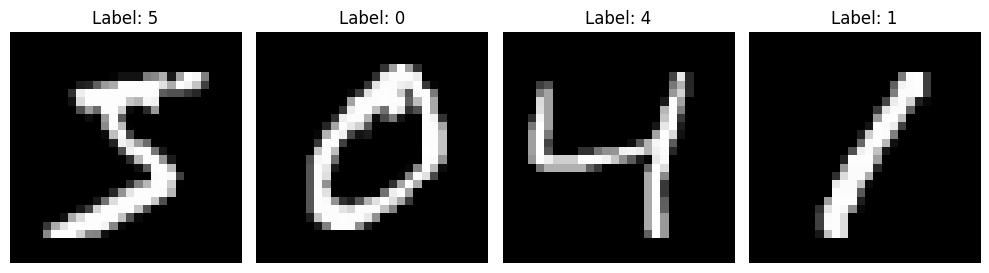

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

plt.figure(figsize=(10,5))
for i in range(4):
  plt.subplot(1, 4, i+1)
  plt.imshow(X_train[i], cmap='gray')
  plt.title(f"Label: {y_train[i]}")
  plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
X_train_t = torch.from_numpy(X_train).float().unsqueeze(1)
y_train_t = torch.from_numpy(y_train).long()

X_test_t = torch.from_numpy(X_test).float().unsqueeze(1)
y_test_t = torch.from_numpy(y_test).long()

X_train_t /= 255.0
X_test_t /= 255.0

train_dataset = TensorDataset(X_train_t, y_train_t)
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)

test_dataset = TensorDataset(X_test_t, y_test_t)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

In [ ]:
num_epoche = 5
num_classes = 10
batch_size = 10
learing_rate = 0.001


In [ ]:
X_train.shape

(60000, 28, 28)

Реализация модели:


In [ ]:
class ConvModel(nn.Module):
  def __init__(self, verbose=False):
    super(ConvModel, self).__init__()
    self.layer_1 = nn.Sequential(nn.Conv2d(1, 32, kernel_size=5, stride=1, padding = 2), nn.ReLU(), nn.MaxPool2d(kernel_size=2, stride=2))
    self.layer_2 = nn.Sequential(nn.Conv2d(32, 64, kernel_size=5, stride=1, padding=2), nn.ReLU(), nn.MaxPool2d(kernel_size=2, stride=2))
    self.drop_out = nn.Dropout()
    self.fc1 = nn.Linear(7*7*64, 1000)
    self.fc2 = nn.Linear(1000, 10)
    self.verbose = verbose

  def forward(self, x):
    out = self.layer_1(x)
    out = self.layer_2(out)
    out = out.view(out.size(0), -1)
    out = self.drop_out(out)
    out = self.fc1(out)
    out = self.fc2(out)
    return out


Процесс обучение модели

In [ ]:
model = ConvModel(verbose=True)
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learing_rate)

In [ ]:
total_steps = len(train_loader)
loss_list = []
accuracy_list = []

for epoch in range(num_epoche):
    for i, (images, labels) in enumerate(train_loader):

        outputs = model(images)
        loss = criterion(outputs, labels)
        loss_list.append(loss.item())


        optimizer.zero_grad()
        loss.backward()
        optimizer.step()


        total = labels.size(0)
        _, predicted = torch.max(outputs.data, 1)
        correct = (predicted == labels).sum().item()
        accuracy = correct / total
        accuracy_list.append(accuracy)


        if model.verbose:
          if i % 100 == 0:
            print(f'Эпоха: [{epoch+1}/{num_epoche}], Шаг: [{i+1}/{total_steps}], '
                  f'Loss: {loss.item():.4f}, Accuracy: {accuracy:.4f}')

Эпоха: [1/5], Шаг: [1/938], Loss: 0.0002, Accuracy: 1.0000
Эпоха: [1/5], Шаг: [101/938], Loss: 0.0111, Accuracy: 1.0000
Эпоха: [1/5], Шаг: [201/938], Loss: 0.0042, Accuracy: 1.0000
Эпоха: [1/5], Шаг: [301/938], Loss: 0.0403, Accuracy: 0.9688
Эпоха: [1/5], Шаг: [401/938], Loss: 0.0027, Accuracy: 1.0000
Эпоха: [1/5], Шаг: [501/938], Loss: 0.0009, Accuracy: 1.0000
Эпоха: [1/5], Шаг: [601/938], Loss: 0.0096, Accuracy: 1.0000
Эпоха: [1/5], Шаг: [701/938], Loss: 0.0027, Accuracy: 1.0000
Эпоха: [1/5], Шаг: [801/938], Loss: 0.0004, Accuracy: 1.0000
Эпоха: [1/5], Шаг: [901/938], Loss: 0.0186, Accuracy: 0.9844
Эпоха: [2/5], Шаг: [1/938], Loss: 0.0254, Accuracy: 0.9844
Эпоха: [2/5], Шаг: [101/938], Loss: 0.0000, Accuracy: 1.0000
Эпоха: [2/5], Шаг: [201/938], Loss: 0.0001, Accuracy: 1.0000
Эпоха: [2/5], Шаг: [301/938], Loss: 0.0018, Accuracy: 1.0000
Эпоха: [2/5], Шаг: [401/938], Loss: 0.0006, Accuracy: 1.0000
Эпоха: [2/5], Шаг: [501/938], Loss: 0.0027, Accuracy: 1.0000
Эпоха: [2/5], Шаг: [601/938]

Тестирование модели

In [ ]:
losses_test = []
for epoch in range(num_epoche):
  model.eval()
  val_loss = 0.0
  with torch.no_grad():
    for images, labels in test_loader:
      outputs = model(images)
      loss = criterion(outputs, labels)
      val_loss += loss.item()
  avg_val_loss = val_loss / len(test_loader)
  losses_test.append(avg_val_loss)

y_predict_numbers = torch.argmax(outputs, dim=1)
y_pred_proba = torch.softmax(outputs, dim=1)

ValueError: x and y must have same first dimension, but have shapes (5,) and (4690,)

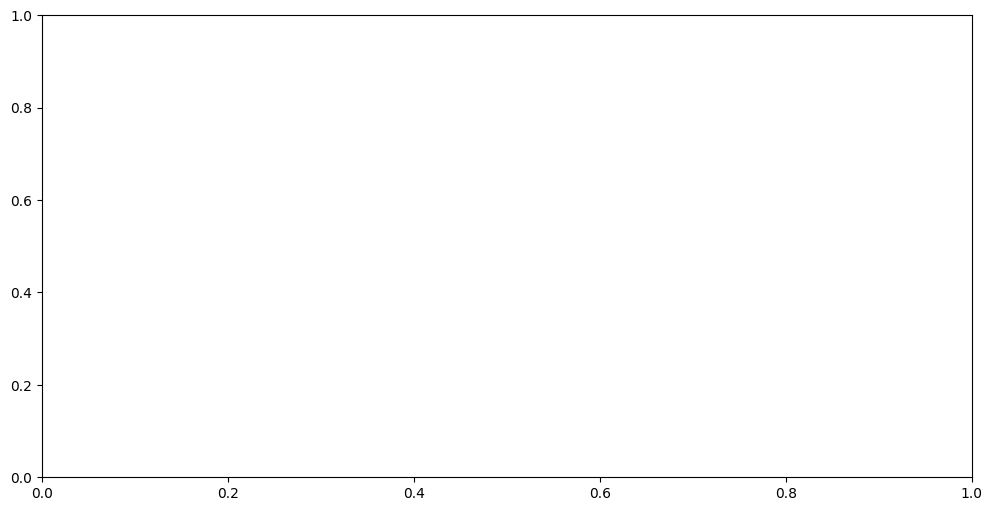

In [ ]:


plt.figure(figsize=(12, 6))
plt.plot(range(1, num_epoche + 1), accuracy_list, label='Обучающая выборка')
plt.plot(range(1, num_epoche + 1), losses_test, label='Тестовая выборка')
plt.xlabel('Эпохи')
plt.ylabel('Лоссы')
plt.legend()
plt.show()

Качество модели


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, multilabel_confusion_matrix, roc_auc_score
accuracy = accuracy_score(y_test, y_predict_numbers)
print(f"Accuracy: {accuracy}")
print()
multi_con_mat = multilabel_confusion_matrix(y_test, y_predict_numbers, labels=range(10))
for i in range(10):
  print(f"Для числа {i + 1}")
  print(multi_con_mat[i])
  print('-' * 20)

Accuracy: 0.991

Для числа 1
[[9015    5]
 [   6  974]]
--------------------
Для числа 2
[[8847   18]
 [   3 1132]]
--------------------
Для числа 3
[[8960    8]
 [  10 1022]]
--------------------
Для числа 4
[[8983    7]
 [   5 1005]]
--------------------
Для числа 5
[[9016    2]
 [  15  967]]
--------------------
Для числа 6
[[9102    6]
 [   5  887]]
--------------------
Для числа 7
[[9032   10]
 [   6  952]]
--------------------
Для числа 8
[[8966    6]
 [  20 1008]]
--------------------
Для числа 9
[[9012   14]
 [   5  969]]
--------------------
Для числа 10
[[8977   14]
 [  15  994]]
--------------------


In [ ]:
def micro_macro_metrics(y_true, y_pred):
  precision_macro = precision_score(y_true, y_pred, average = 'macro')
  recall_macro = recall_score(y_true, y_pred, average = 'macro')
  f1_macro = f1_score(y_true, y_pred, average = 'macro')

  precision_micro = precision_score(y_true, y_pred, average = 'micro')
  recall_micro = recall_score(y_true, y_pred, average = 'micro')
  f1_micro = f1_score(y_true, y_pred, average = 'micro')

  print('Макро метрики:')
  print()
  print(f'Precision: {precision_macro}')
  print(f'Recall: {recall_macro}')
  print(f'F1: {f1_macro}')
  print()
  print('Микро метрики:')
  print(f'Precision: {precision_micro}')
  print(f'Recall: {recall_micro}')
  print(f'F1: {f1_micro}')

In [ ]:
micro_macro_metrics(y_test, y_predict_numbers)

Макро метрики:

Precision: 0.9911330503971134
Recall: 0.9909995656111293
F1: 0.991050199088679

Микро метрики:
Precision: 0.991
Recall: 0.991
F1: 0.991
